# [DEMO] Part 4: Candidate Evaluation & Selection

In [1]:
import pandas as pd
import Technic as tc

In [2]:
from DEMO_1_Setup import *

e:\OneDrive\Git\Project_LEGO\Technic\data.py:1549: UserWarning: apply_to_all(): No scenario internal data for Scenario/Adv; using main internal data as context. Internal scenario updates will be skipped.
  warnings.warn(
e:\OneDrive\Git\Project_LEGO\Technic\data.py:1575: UserWarning: apply_to_all(): Scenario internal data for Scenario/Adv is unavailable; returned internal updates were ignored.
  warnings.warn(
e:\OneDrive\Git\Project_LEGO\Technic\data.py:1549: UserWarning: apply_to_all(): No scenario internal data for Scenario/Sev; using main internal data as context. Internal scenario updates will be skipped.
  warnings.warn(
e:\OneDrive\Git\Project_LEGO\Technic\data.py:1575: UserWarning: apply_to_all(): Scenario internal data for Scenario/Sev is unavailable; returned internal updates were ignored.
  warnings.warn(
e:\OneDrive\Git\Project_LEGO\Technic\data.py:1549: UserWarning: apply_to_all(): No scenario internal data for Scenario/Base; using main internal data as context. Internal s

In [3]:
seg.load_cms(
    search_id='search_home_price_GR1_20260129_150746',
)

Loading passed cms: 100%|██████████| 777/777 [01:29<00:00,  8.69cm/s]


=== Updated Ranked Results ===
model_id  fit_score  is_err_score  oos_err_score  composite_score
     cm1   0.995421      0.917433       0.075568         0.662807
     cm2   1.000000      0.936646       0.033848         0.656831
     cm3   0.971750      0.915535       0.022119         0.636468
     cm4   0.884101      0.840879       0.116204         0.613728
     cm5   0.912316      0.861797       0.065579         0.613231
     cm6   0.904508      0.852971       0.032307         0.596595
     cm7   0.400897      0.415883       0.901566         0.572782
     cm8   0.875817      0.809511       0.029405         0.571578
     cm9   0.866198      0.822404       0.016107         0.568236
    cm10   0.792164      0.722292       0.184300         0.566252

=== Top 10 Model Formulas ===
cm1: OLS-HAC(4):home_price_GR1~C+M:2+M:3+M:4+M:5+M:6+M:7+M:8+M:9+M:10+M:11+M:12+USGOV2Y_LV_L3+USPRIME_MMDF12_L2
cm2: OLS-HAC(4):home_price_GR1~C+M:2+M:3+M:4+M:5+M:6+M:7+M:8+M:9+M:10+M:11+M:12+USGOV2Y_LV_L3+USPRIM

In [4]:
seg.rerank_cms(
    rank_weights=(1,1,2),
    overwrite=True
)

=== Updated Ranked Results ===
model_id  fit_score  is_err_score  oos_err_score  composite_score
     cm1   0.400897      0.415883       0.901566         0.654978
     cm2   0.398466      0.354654       0.892361         0.634460
     cm3   0.303841      0.286413       0.968349         0.631738
     cm4   0.388477      0.386611       0.870839         0.629191
     cm5   0.406478      0.477184       0.814226         0.628029
     cm6   0.361292      0.344073       0.879071         0.615877
     cm7   0.308566      0.313002       0.909570         0.610177
     cm8   0.250394      0.257182       0.964493         0.609141
     cm9   0.359895      0.319833       0.878303         0.609083
    cm10   0.301111      0.328909       0.899596         0.607303

=== Top 10 Model Formulas ===
cm1: OLS-HAC(4):home_price_GR1~C+M:2+M:3+M:4+M:5+M:6+M:7+M:8+M:9+M:10+M:11+M:12+USCORPBBB10Y_MMDF12+USGOV2Y_MMDF12
cm2: OLS-HAC(4):home_price_GR1~C+M:2+M:3+M:4+M:5+M:6+M:7+M:8+M:9+M:10+M:11+M:12+USCORPBBB10Y_MMDF

=== Candidate Models to Report ===
- cm1: OLS-HAC(4):home_price_GR1~C+M:2+M:3+M:4+M:5+M:6+M:7+M:8+M:9+M:10+M:11+M:12+USCORPBBB10Y_MMDF12+USGOV2Y_MMDF12
- cm2: OLS-HAC(4):home_price_GR1~C+M:2+M:3+M:4+M:5+M:6+M:7+M:8+M:9+M:10+M:11+M:12+USCORPBBB10Y_MMDF6+USGOV10Y_MMDF6
- cm3: OLS-HAC(4):home_price_GR1~C+M:2+M:3+M:4+M:5+M:6+M:7+M:8+M:9+M:10+M:11+M:12+USMORT30Y_MMDF12_L2+USPRIME_MMDF12
- cm4: OLS-HAC(4):home_price_GR1~C+M:2+M:3+M:4+M:5+M:6+M:7+M:8+M:9+M:10+M:11+M:12+USCORPBBB10Y_MMDF6_L1+USGOV10Y_MMDF6
- cm5: OLS-HAC(4):home_price_GR1~C+M:2+M:3+M:4+M:5+M:6+M:7+M:8+M:9+M:10+M:11+M:12+USCORPBBB10Y_MMDF3_L1+USGOV2Y_MMDF3
- cm6: OLS-HAC(4):home_price_GR1~C+M:2+M:3+M:4+M:5+M:6+M:7+M:8+M:9+M:10+M:11+M:12+USCORPBBB10Y_MMDF12+USGOV2Y_MMDF12_L1
- cm7: OLS-HAC(4):home_price_GR1~C+M:2+M:3+M:4+M:5+M:6+M:7+M:8+M:9+M:10+M:11+M:12+USCORPAA10Y_MMDF12_L3+USFF_MMDF6_L2+USHHPDI_MMDF
- cm8: OLS-HAC(4):home_price_GR1~C+M:2+M:3+M:4+M:5+M:6+M:7+M:8+M:9+M:10+M:11+M:12+USMORT30Y_MMDF12_L2+USPRIME_MMDF12_L1
- cm9: 

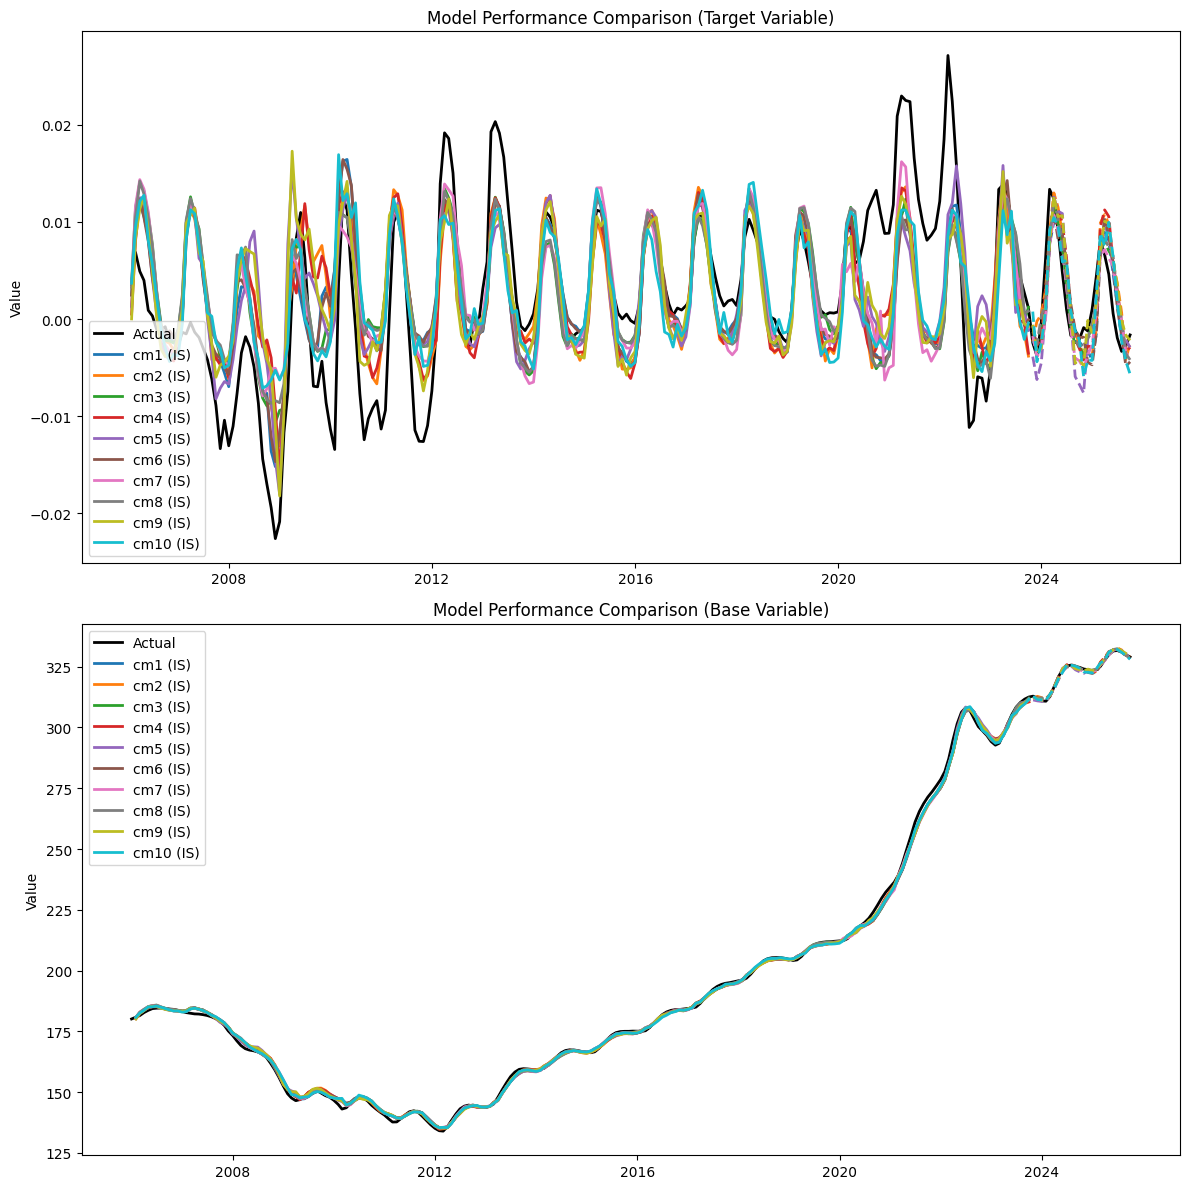

In [5]:
seg.show_report(
    # show_params=True,
    # show_scens=True,
)

=== In-Sample Performance ===
   R²  Adj R²    ME   MAE  RMSE
0.451   0.415 0.019 0.005 0.007

=== Out-of-Sample Performance ===
   ME   MAE  RMSE
0.006 0.003 0.003

=== Model Parameters ===
           Variable       Coef Pvalue  VIF         SE  CI_2_5 CI_97_5
              const 4.6036e-04  0.800  NaN     0.0018 -0.0031  0.0040
                M:2     0.0075  0.000 1.83     0.0015  0.0046  0.0105
                M:3     0.0104  0.000 1.83     0.0018  0.0067  0.0140
                M:4     0.0097  0.000 1.83     0.0020  0.0058  0.0137
                M:5     0.0076  0.001 1.83     0.0022  0.0032  0.0120
                M:6     0.0038  0.082 1.83     0.0022 -0.0005  0.0082
                M:7 2.9487e-04  0.898 1.83     0.0023 -0.0042  0.0048
                M:8    -0.0025  0.313 1.83     0.0024 -0.0072  0.0023
                M:9    -0.0030  0.176 1.83     0.0022 -0.0073  0.0013
               M:10    -0.0033  0.096 1.79     0.0020 -0.0071  0.0006
               M:11    -0.0037  0.026 1

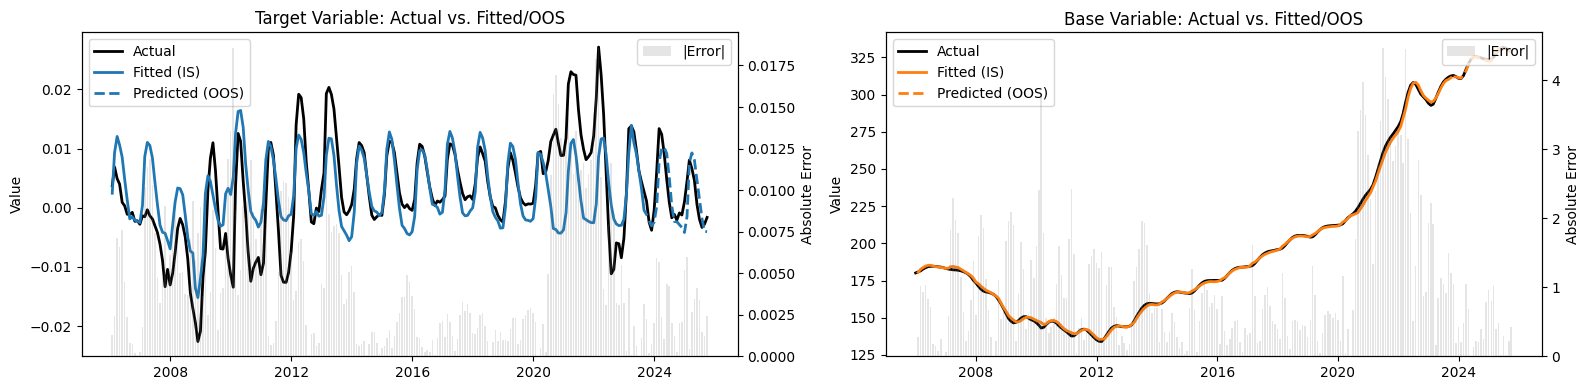


=== Model: cm1 — Scenario Analysis ===
Scenario plots for Scenario generated successfully.


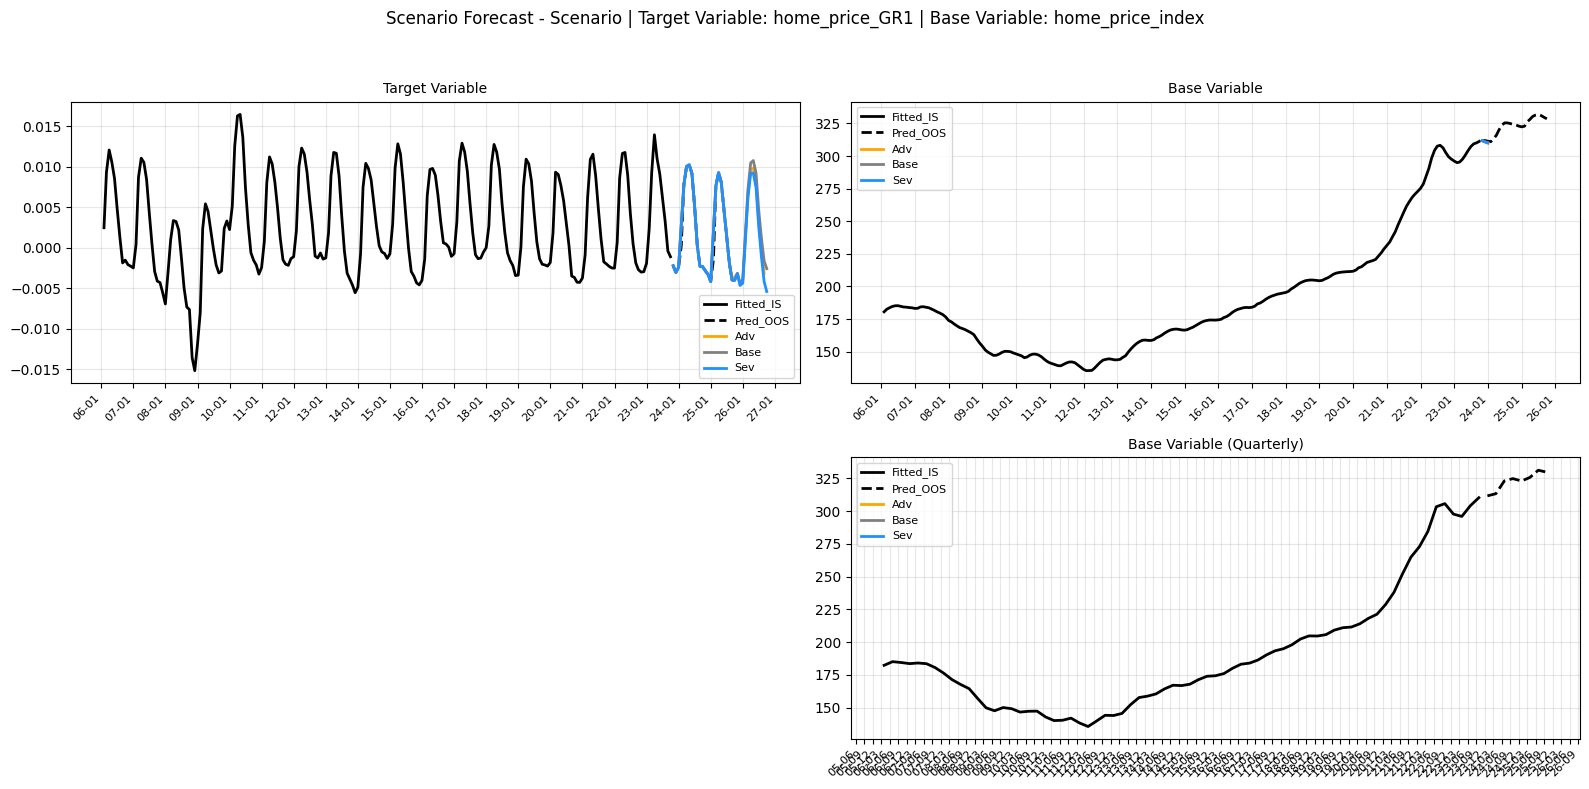

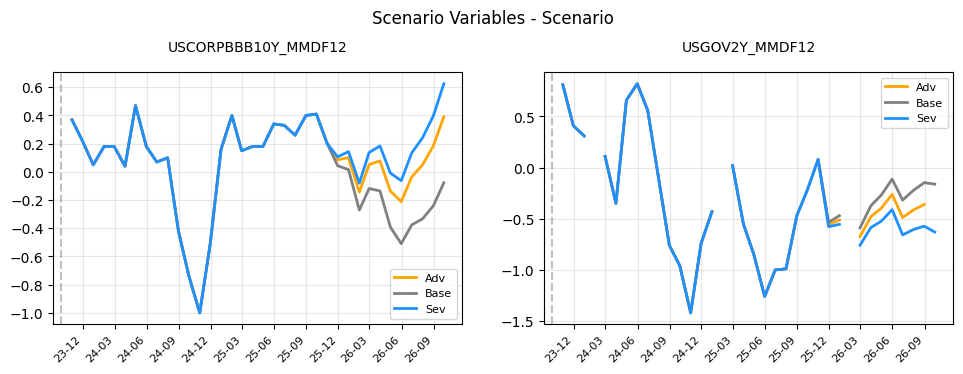

In [6]:
seg.cms['cm1'].show_report(show_scens=True)

In [9]:
scen = seg.cms['cm1'].scen_manager_in

In [10]:
scen.forecast_y_df['Scenario'].loc[lambda x:x.Period != 'Pre-P0']

,Period,Actual,Fitted_IS,Pred_OOS,Adv,Sev,Base
2023-07-31,P0,0.004393,0.003267,NaN,NaN,NaN,NaN
2023-08-31,P0,0.002747,-0.000420,NaN,NaN,NaN,NaN
2023-09-30,P0,0.001126,-0.001128,NaN,NaN,NaN,NaN
2023-10-31,P1,-0.002439,NaN,-0.002236,-0.002236,-0.002236,-0.002236
2023-11-30,P1,-0.003803,NaN,-0.003065,-0.003065,-0.003065,-0.003065
2023-12-31,P1,-0.000425,NaN,-0.002445,-0.002445,-0.002445,-0.002445
2024-01-31,P2,0.006188,NaN,0.000264,NaN,NaN,NaN
2024-02-29,P2,0.013367,NaN,0.007720,0.007720,0.007720,0.007720
2024-03-31,P2,0.012396,NaN,0.010028,0.010028,0.010028,0.010028
2024-04-30,P3,0.009177,NaN,0.010217,0.010217,0.010217,0.010217


In [14]:
scen.X_scens['Scenario']['Adv']

,M:2,M:3,M:4,M:5,M:6,M:7,M:8,M:9,M:10,M:11,M:12,USCORPBBB10Y_MMDF12,USGOV2Y_MMDF12
observation_date,,,,,,,,,,,,,
2023-10-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.370000,0.810000
2023-11-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.220000,0.410000
2023-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.050000,0.310000
2024-01-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.180000,NaN
2024-02-29,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.180000,0.110000
2024-03-31,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.040000,-0.350000
2024-04-30,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.470000,0.660000
2024-05-31,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.180000,0.820000
2024-06-30,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.070000,0.560000


In [16]:
scen.dm.scen_mevs['Scenario']['Adv']['USGOV2Y']['2025-08-30':]

observation_date
2025-08-31    3.690000
2025-09-30         NaN
2025-10-31    3.690000
2025-11-30    3.654043
2025-12-31    3.618085
2026-01-31    3.582128
2026-02-28    3.546170
2026-03-31    3.510213
2026-04-30    3.474255
2026-05-31    3.438298
2026-06-30    3.402340
2026-07-31    3.366383
2026-08-31    3.330426
2026-09-30    3.294468
2026-10-31    3.258511
2026-11-30    3.222553
2026-12-31    3.186596
2027-01-31    3.150638
2027-02-28    3.114681
2027-03-31    3.078723
2027-04-30    3.042766
2027-05-31    3.006809
2027-06-30    2.970851
2027-07-31    2.934894
2027-08-31    2.898936
2027-09-30    2.862979
2027-10-31    2.827021
2027-11-30    2.791064
2027-12-31    2.755106
2028-01-31    2.719149
2028-02-29    2.683191
2028-03-31    2.647234
2028-04-30    2.611277
2028-05-31    2.575319
2028-06-30    2.539362
2028-07-31    2.503404
2028-08-31    2.467447
2028-09-30    2.431489
2028-10-31    2.395532
2028-11-30    2.359574
2028-12-31    2.323617
2029-01-31    2.287660
2029-02-28    2.2

In [11]:
dm.scen_mevs['Scenario']['Adv']['USGOV2Y']['2025-08-30':]

observation_date
2025-08-31    3.690000
2025-09-30    3.690000
2025-10-31    3.690000
2025-11-30    3.654043
2025-12-31    3.618085
2026-01-31    3.582128
2026-02-28    3.546170
2026-03-31    3.510213
2026-04-30    3.474255
2026-05-31    3.438298
2026-06-30    3.402340
2026-07-31    3.366383
2026-08-31    3.330426
2026-09-30    3.294468
2026-10-31    3.258511
2026-11-30    3.222553
2026-12-31    3.186596
2027-01-31    3.150638
2027-02-28    3.114681
2027-03-31    3.078723
2027-04-30    3.042766
2027-05-31    3.006809
2027-06-30    2.970851
2027-07-31    2.934894
2027-08-31    2.898936
2027-09-30    2.862979
2027-10-31    2.827021
2027-11-30    2.791064
2027-12-31    2.755106
2028-01-31    2.719149
2028-02-29    2.683191
2028-03-31    2.647234
2028-04-30    2.611277
2028-05-31    2.575319
2028-06-30    2.539362
2028-07-31    2.503404
2028-08-31    2.467447
2028-09-30    2.431489
2028-10-31    2.395532
2028-11-30    2.359574
2028-12-31    2.323617
2029-01-31    2.287660
2029-02-28    2.2